<a href="https://colab.research.google.com/github/shstudy/ITB_3team/blob/main/3team_%5B%EB%B3%B4%EC%A1%B0%5D%EA%B5%B0%EC%A7%91%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [ ]:
!pip install mglearn 
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as m
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

import mglearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve

# 데이터 준비

In [ ]:
rawdf = pd.read_csv('https://raw.githubusercontent.com/shstudy/ITB_3team/main/wo_data_20_21Y%2B11-28.csv', encoding = 'CP949')

In [ ]:
#df                #데이터 프레임 확인
#df.isnull().sum() #결측치 확인
#df.info()         #데이터 유형 확인

In [ ]:
print(rawdf['재방문의도'].describe())

count    1184.000000
mean        3.875000
std         0.561892
min         1.000000
25%         4.000000
50%         4.000000
75%         4.000000
max         5.000000
Name: 재방문의도, dtype: float64


In [ ]:
rawdf['재방문여부'] = rawdf['재방문의도'] > 3

In [ ]:
# 0,1로 바꾸기
x_list = ["관광휴양여부", "여행활동1", "여행활동2","여행활동3", "여행활동4", "여행활동5"]

for i in x_list:
  x1 = {i : {'N':'0','Y':'1'}}
  rawdf.replace(x1, inplace=True)

x2 = {'재방문여부' :{False:'재방문NO',True:'재방문YES'}}
rawdf.replace(x2, inplace=True)

In [ ]:
#자료형 바꾸기
df = rawdf.astype(dtype='object')
df = df.astype({'여행일수(박)':'int', '여행총경비':'int', '지출비용포함인원수':'int','1인지출비용':'int'})

#군집화



In [ ]:
# 데이터 처리를 위한 라이브러리
import numpy as np
import pandas as pd
# 데이터 시각화를 위한 라이브러리
from matplotlib.colors import ListedColormap
import matplotlib as mat
from matplotlib import font_manager
import matplotlib.pyplot as plt    
import seaborn as sns
# 데이터 분석을 위한 라이브러리
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from yellowbrick.cluster import KElbowVisualizer
# 경고메시지 생략을 위한 라이브러리
import warnings
# Rich output을 쉘에서 출력하기 위한 설정
%matplotlib inline

#Importing the Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
np.random.seed(3)


In [ ]:
!pip install -U pandas-profiling

In [ ]:
df

In [ ]:
df.columns

In [ ]:
cldf = df.copy()

In [ ]:
cldf = cldf.drop(['ID', '연도', '학력',  '주5일근무제실시여부', '계절', '차량보유여부', 
              '지출비용포함인원수', '개인휴가사용여부','시', '여행지선택이유_1순위', '여행지선택이유_2순위',
              '만족도_자연경관', '만족도_문화유산', '만족도_교통', '만족도_식당및음식', '만족도_쇼핑',
              '만족도_관광정보및안내시설', '만족도_관광지편의시설', '만족도_지역관광종사자의친절성', '만족도_체험프로그램',
              '만족도_관광지물가', '만족도_관광지혼잡도', '총만족도', '총만족도_이진','재방문여부'], axis = 1)

In [ ]:
cldf1 = cldf.copy()

In [ ]:
cldf.info()

In [ ]:
cldf = cldf.astype(dtype='int')

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300,random_state=0)
#군집개수(n_cluster)는 3
#초기 중심 설정방식(init)은 기본값인 k-means++
#최대 반복회수(max_iter)도 기본값인 300
#수행 결과 고정을 위해 random_state 설정

https://dacon.io/codeshare/5776?dtype=recent

In [ ]:
kmeans.fit(cldf)

In [ ]:
np.set_printoptions(threshold=np.inf, linewidth=np.inf)

print(kmeans.labels_)

In [ ]:
cldf['cluster']= kmeans.labels_

In [ ]:
cldf.columns

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(cldf)

cldf['pca_x'] = pca_transformed[:,0]
cldf['pca_y'] = pca_transformed[:,1]
cldf.head(3)


In [ ]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = cldf[cldf['cluster']==0].index
marker1_ind = cldf[cldf['cluster']==1].index
marker2_ind = cldf[cldf['cluster']==2].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. o, s, ^ 로 marker 표시
plt.scatter(x=cldf.loc[marker0_ind,'pca_x'], y=cldf.loc[marker0_ind,'pca_y'], marker='o') 
plt.scatter(x=cldf.loc[marker1_ind,'pca_x'], y=cldf.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=cldf.loc[marker2_ind,'pca_x'], y=cldf.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

2


In [ ]:
# 데이터 처리를 위한 라이브러리
import numpy as np
import pandas as pd
# 데이터 시각화를 위한 라이브러리
from matplotlib.colors import ListedColormap
import matplotlib as mat
from matplotlib import font_manager
import matplotlib.pyplot as plt    
import seaborn as sns
# 데이터 분석을 위한 라이브러리
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from yellowbrick.cluster import KElbowVisualizer
# 경고메시지 생략을 위한 라이브러리
import warnings
# Rich output을 쉘에서 출력하기 위한 설정
%matplotlib inline
     

In [ ]:
#Importing the Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
np.random.seed(3)

In [ ]:
scaler = StandardScaler()
scaler.fit(cldf1)
scaled_ds = pd.DataFrame(scaler.transform(cldf1),columns=cldf1.columns)
print("스케일링 완료")

In [ ]:
cldf1

In [ ]:
#tsne
# 2차원 t-SNE 임베딩

tsne_np = TSNE(n_components = 2).fit_transform(scaled_ds)
tsne_df = pd.DataFrame(tsne_np, columns = ['component 0', 'component 1'])

In [ ]:
tsne_df.describe().T

In [ ]:
#A 2D Projection Of Data In The Reduced Dimension
x =tsne_df["component 0"]
y =tsne_df["component 1"]

#To plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(x,y, c="maroon", marker="o" )
ax.set_title("A 2D Projection Of Data In The Reduced Dimension")
plt.show()

In [ ]:
#클러스터링

# 엘보우 기법 (Elbow Method)을 사용하여 몇개의 클러스터를 만들지 확인
print('Elbow Method: 몇개의 클러스터를 만들어야 할까?')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(tsne_df)
Elbow_M.show()

#4~5개의 클러스터를 만들면 됨

In [ ]:
#4개로 클러스터링 모델 시작
AC = AgglomerativeClustering(n_clusters=4)

# fit model and predict clusters
yhat_AC = AC.fit_predict(tsne_df)
tsne_df["Clusters"] = yhat_AC
cldf1["Clusters"]= yhat_AC

In [ ]:

#To plot some selected features 
#Setting up colors prefrences
sns.set(rc={"axes.facecolor":"#FFF9ED","figure.facecolor":"#FFF9ED"})
pallet = ["#682F2F", "#9E726F", "#D6B2B1", 'lightcoral']
     

In [ ]:

#클러스터가 어떻게 구성됐는지 확인을 위해 3D plot으로 확인
#Plotting the clusters
fig = plt.figure(figsize=(10,10))
ax = plt.subplot(111, label="bla")
ax.scatter(x, y,s=40, c=tsne_df["Clusters"], marker='o')
ax.set_title("The Plot Of The Clusters")
plt.show()

In [ ]:
ds = cldf1

In [ ]:
# 그룹 별로 몇명 씩 분포되어있는지 확인
pl = sns.countplot(x=ds["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.figure(figsize = (20,10))
plt.show()

#0번 그룹에 해당되는 고객의 수가 가장 많고 3번 그룹에 해당되는 고객의 수가 가장 적음

In [ ]:
ds_0 = ds[ds["Clusters"] == 0]
print(ds_0.shape)

ds_1 = ds[ds["Clusters"] == 1]
print(ds_1.shape)

ds_2 = ds[ds["Clusters"] == 2]
print(ds_2.shape)

ds_3 = ds[ds["Clusters"] == 3]
print(ds_3.shape)

In [ ]:
ds.columns

In [ ]:
sns.catplot(kind='count', data=ds, x='Clusters', hue="연령")

In [ ]:
sns.catplot(kind='count', data=ds, x='Clusters', hue="혼인상태")

In [ ]:
sns.catplot(kind='count', data=ds, x='Clusters', hue="직장지위")

In [ ]:
sns.catplot(kind='count', data=ds, x='Clusters', hue="직업")

In [ ]:
sns.catplot(kind='count', data=ds, x='Clusters', hue="주업")

In [ ]:
sns.catplot(kind='count', data=ds, x='Clusters', hue="여행유형")

In [ ]:
sns.catplot(kind='count', data=ds, x='Clusters', hue='거주지역')

In [ ]:
sns.catplot(kind='count', data=ds, x='Clusters', hue='전반적만족도')

군집화 2

In [ ]:
cldf2 = df.copy()
X = cldf2.drop(['ID', '연도', '학력',  '주5일근무제실시여부', '계절', '차량보유여부', 
              '지출비용포함인원수', '개인휴가사용여부','시','총만족도','총만족도_이진','재방문여부'], axis = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

In [ ]:
X_scaled = StandardScaler().fit_transform(X)
X_scaled = MinMaxScaler().fit_transform(X)

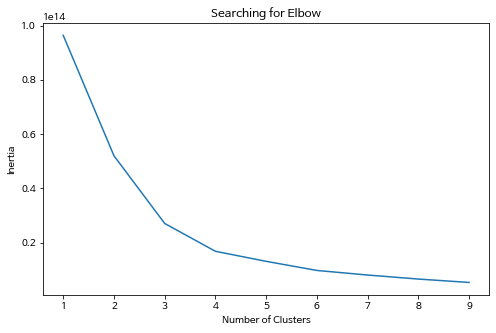

In [ ]:
clusters =[]
for i in range(1, 10):
    km = KMeans(n_clusters=i, random_state=0).fit(X)
    clusters.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(8, 5))
sns.lineplot(x=list(range(1, 10)), y=clusters, ax=ax)
ax.set_title('Searching for Elbow')
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Inertia')
plt.show() # 3 또는 5 중에서 선택


In [ ]:
X

,성별,연령,혼인상태,거주지역,직업,주업,직장지위,개인소득,관광휴양여부,여행유형,...,만족도_관광정보및안내시설,만족도_관광지편의시설,만족도_지역관광종사자의친절성,만족도_체험프로그램,만족도_관광지물가,만족도_관광지혼잡도,전반적만족도,재방문의도,타인추천의도,만족도점수
0,1,5,2,1,3,3,3,5,1,4,...,5,4,4,4,4,4,4,4,4,12
1,1,5,4,1,3,4,3,4,1,4,...,4,4,4,3,4,4,4,4,4,12
2,1,4,2,1,1,3,1,4,1,4,...,4,4,4,4,4,4,4,4,4,12
3,1,5,2,1,1,3,1,4,1,4,...,9,9,9,9,9,9,3,3,3,9
4,2,3,1,1,1,3,1,3,0,2,...,4,3,3,9,3,4,4,4,4,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,1,4,2,17,1,3,1,4,1,4,...,3,3,3,3,3,3,3,3,3,9
1180,2,5,2,17,3,5,3,3,1,4,...,3,3,9,9,3,2,4,4,4,12
1181,2,4,2,17,1,5,1,4,1,4,...,4,4,4,4,3,4,5,4,4,13
1182,1,4,2,17,1,3,1,5,1,4,...,9,9,9,9,9,9,3,3,3,9


In [ ]:
X.columns

Index(['성별', '연령', '혼인상태', '거주지역', '직업', '주업', '직장지위', '개인소득', '관광휴양여부',
       '여행유형', '월', '여행일수(박)', '여행총경비', '1인지출비용', '지역코드', '숙박시설', '여행활동1',
       '여행활동2', '여행활동3', '여행활동4', '여행활동5', '주요이동교통수단', '여행지선택이유_1순위',
       '여행지선택이유_2순위', '만족도_자연경관', '만족도_문화유산', '만족도_교통', '만족도_식당및음식', '만족도_쇼핑',
       '만족도_관광정보및안내시설', '만족도_관광지편의시설', '만족도_지역관광종사자의친절성', '만족도_체험프로그램',
       '만족도_관광지물가', '만족도_관광지혼잡도', '전반적만족도', '재방문의도', '타인추천의도', '만족도점수'],
      dtype='object')

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score 

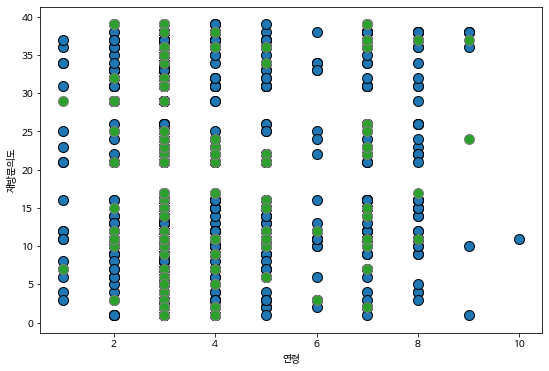

모든 데이터의 평균 실루엣 계수값: 0.7057061591402469
데이비스-볼딘지수: 0.6037299201533592


In [ ]:
km3 = KMeans(n_clusters=3, random_state=0).fit(X)
labels = km3.labels_

mglearn.discrete_scatter(X['주업'], X['지역코드'], labels, markers='o')
plt.xlabel("연령")
plt.ylabel("재방문의도")
plt.show()

average_score = silhouette_score(X, labels)
print('모든 데이터의 평균 실루엣 계수값:', format(average_score)) 

dv = davies_bouldin_score(X, labels)
print('데이비스-볼딘지수:', format(dv)) 
